In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
file_path = '/content/Mall_Customers.csv'
mall_customers_df = pd.read_csv(file_path)

In [4]:
# Basic statistical description
description = mall_customers_df.describe()
mall_customers_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Check for missing values
missing_values = mall_customers_df.isnull().sum()

In [6]:
# Plotting distributions of numerical features
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0.5, 1.0, 'Age Distribution')

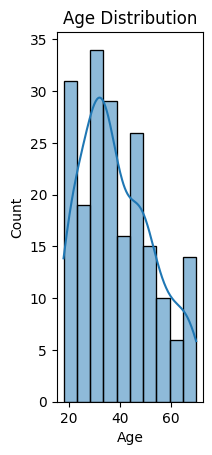

In [7]:
# Distribution of Age
plt.subplot(1, 3, 1)
sns.histplot(mall_customers_df['Age'], bins=10, kde=True)
plt.title('Age Distribution')

Text(0.5, 1.0, 'Annual Income Distribution')

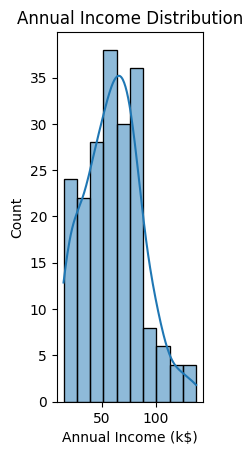

In [8]:
# Distribution of Annual Income
plt.subplot(1, 3, 2)
sns.histplot(mall_customers_df['Annual Income (k$)'], bins=10, kde=True)
plt.title('Annual Income Distribution')

Text(0.5, 1.0, 'Spending Score Distribution')

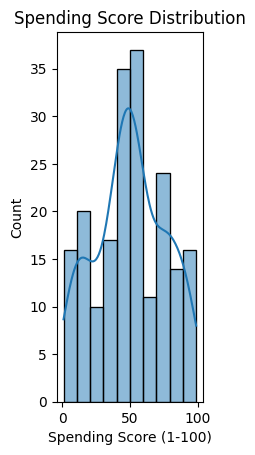

In [13]:
# Distribution of Spending Score
plt.subplot(1, 3, 3)
sns.histplot(mall_customers_df['Spending Score (1-100)'], bins=10, kde=True)
plt.title('Spending Score Distribution')

In [14]:
# Selecting features for clustering
# Using 'Annual Income (k$)' and 'Spending Score (1-100)' for clustering
features = mall_customers_df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [15]:
# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [16]:
# Finding the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

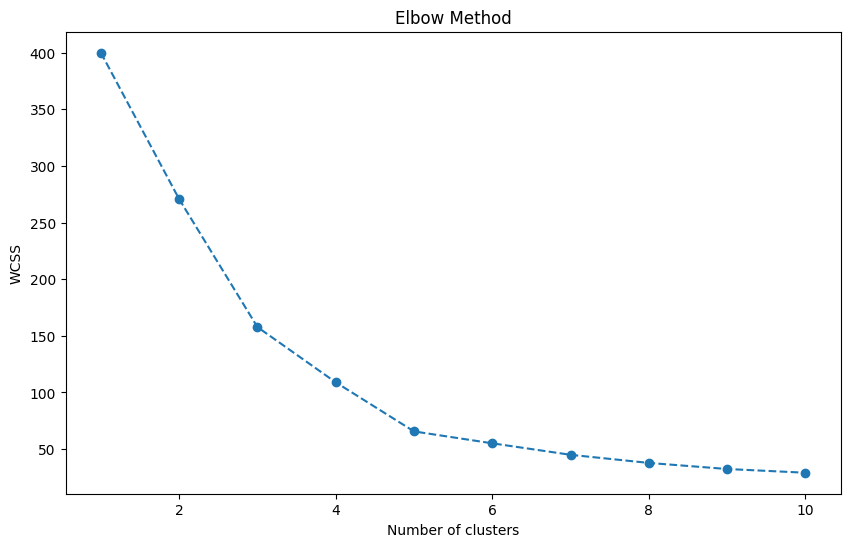

In [20]:
# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
# Applying K-means with the optimal number of clusters
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', n_init=10, random_state=42)
# Fit the model
kmeans.fit(scaled_features)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [29]:
# Predicting the cluster labels
cluster_labels = kmeans.labels_

In [30]:
# Assigning the labels to each row in dataframe
mall_customers_df['Cluster'] = cluster_labels

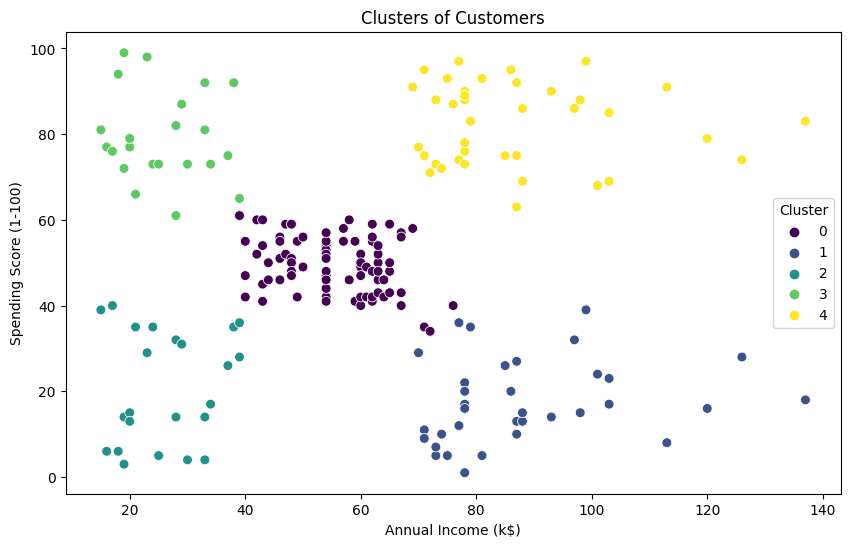

In [31]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=mall_customers_df, hue='Cluster', palette='viridis', s=50)
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc='best', title='Cluster')
plt.show()

In [32]:
# Profiling the clusters
cluster_profile = mall_customers_df.groupby('Cluster').mean()
cluster_profile['Count'] = mall_customers_df['Cluster']. value_counts()
cluster_profile = cluster_profile.sort_values('Count', ascending=False)

# Display the cluster profiles
print(cluster_profile)

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
0         86.320988  42.716049           55.296296               49.518519   
4        162.000000  32.692308           86.538462               82.128205   
1        164.371429  41.114286           88.200000               17.114286   
2         23.000000  45.217391           26.304348               20.913043   
3         23.090909  25.272727           25.727273               79.363636   

         Count  
Cluster         
0           81  
4           39  
1           35  
2           23  
3           22  


<ipython-input-32-6a47629c312c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_profile = mall_customers_df.groupby('Cluster').mean()
